In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)


miles_per_week = np.random.normal(
    loc=55, scale=10, size=500
)  # mean=55, stddev=10, and 500 samples
miles_per_week = np.clip(miles_per_week, 30, 120)
miles_per_week = np.round(miles_per_week).astype(int)


farthest_run = np.random.normal(
    loc=18, scale=3, size=500
)  # mean=55, stddev=10, and 500 samples
farthest_run = np.clip(farthest_run, 12, 26)
farthest_run = np.round(farthest_run).astype(int)

qualified_boston_marathon = np.random.randint(2, size=500)
qualified_boston_marathon[miles_per_week > 55] = 1


data = {
    "miles_per_week": miles_per_week,
    "farthest_run": farthest_run,
    "qualified_boston_marathon": qualified_boston_marathon,
}

df = pd.DataFrame(data)

In [3]:
df

,miles_per_week,farthest_run,qualified_boston_marathon
0,73,19,1
1,59,18,1
2,65,21,1
3,77,17,1
4,74,17,1
...,...,...,...
495,54,19,1
496,48,17,0
497,50,18,0
498,45,15,1


In [19]:
df.describe().round(3)

,miles_per_week,farthest_run,qualified_boston_marathon
count,500.000,500.000,500.000
mean,54.774,17.820,0.752
std,9.960,2.868,0.432
min,30.000,12.000,0.000
25%,48.000,16.000,1.000
50%,54.500,18.000,1.000
75%,62.000,20.000,1.000
max,82.000,26.000,1.000


In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

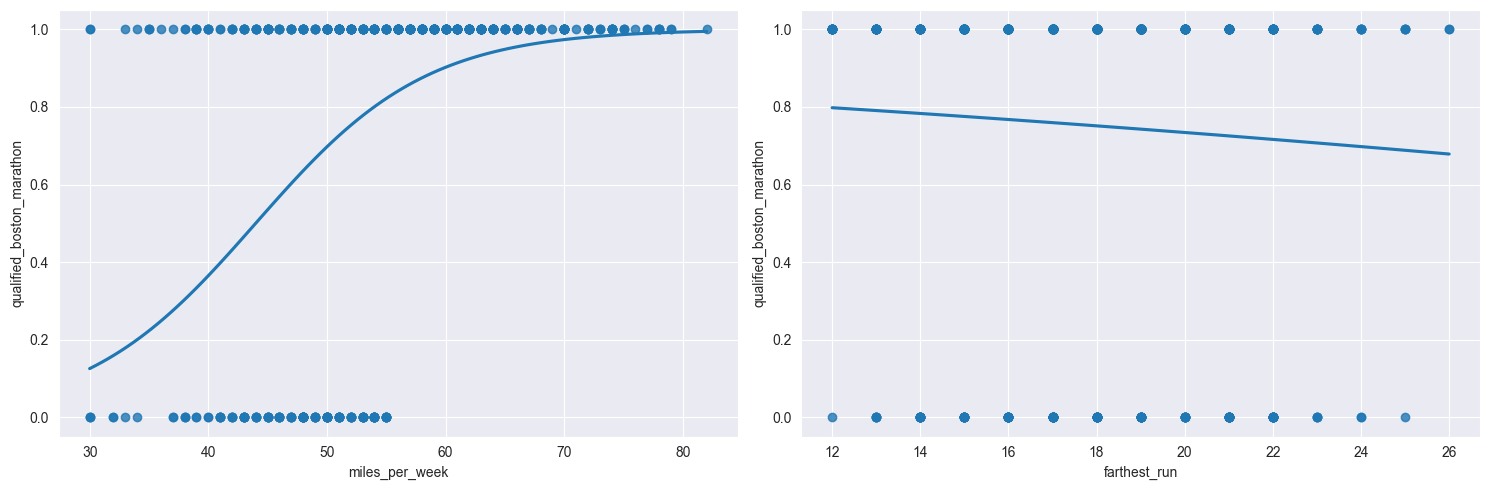

In [16]:
_, axs = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x='miles_per_week', y='qualified_boston_marathon', data=df, logistic=True, ci=None, ax=axs[0])
sns.regplot(x='farthest_run', y='qualified_boston_marathon', data=df, logistic=True, ci=None,  ax=axs[1])
[ax.grid(True) for ax in axs]
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop(columns=['qualified_boston_marathon'])
y=df['qualified_boston_marathon']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=112)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
model.score(X_test, y_test)

0.768

In [30]:
model.score(X_train, y_train)

0.736

In [31]:
y_pred = model.predict(X_test)

<Figure size 800x600 with 0 Axes>

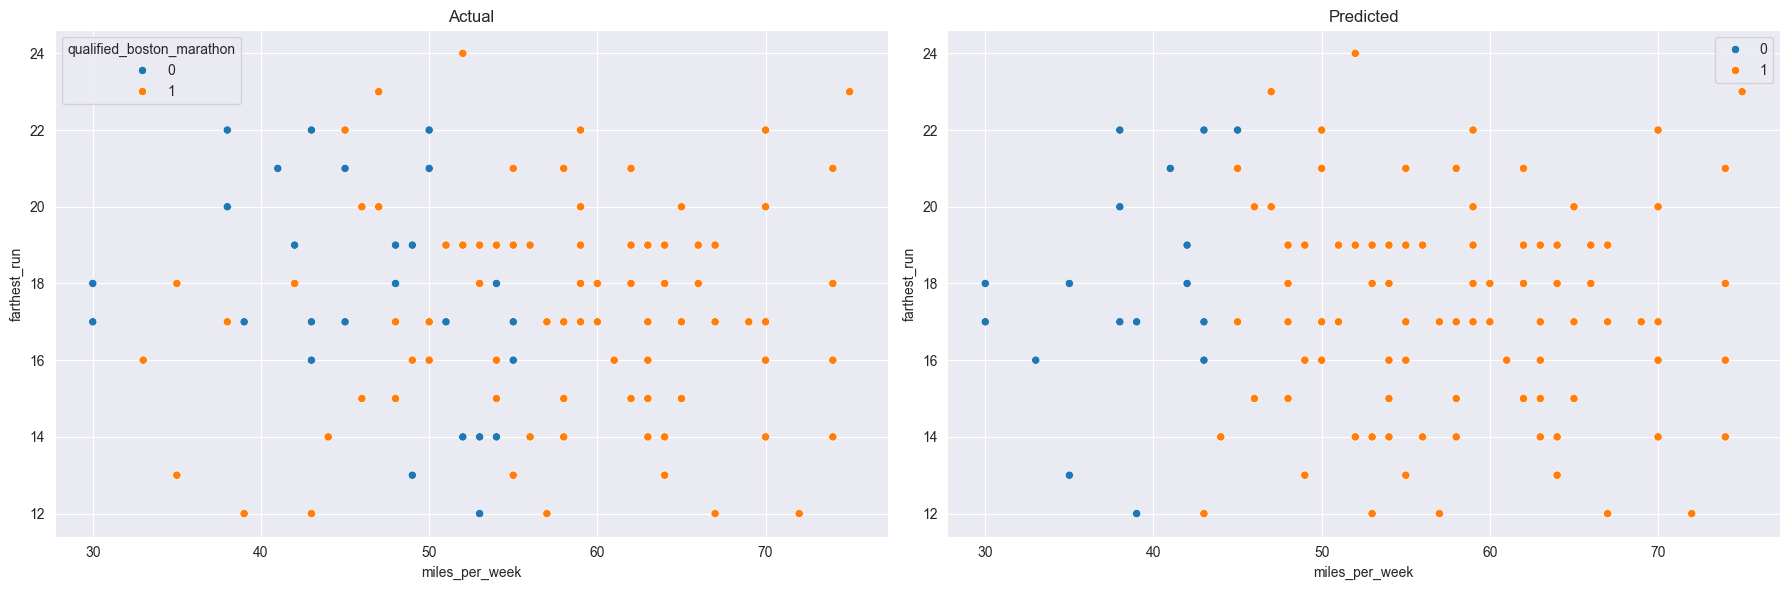

In [51]:
plt.figure(figsize=(8,6))
_, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.scatterplot(x='miles_per_week', y='farthest_run', data=X_test, hue=y_test,ax=axs[0])
axs[0].set_title('Actual')
sns.scatterplot(x='miles_per_week', y='farthest_run', data=X_test, hue=y_pred,ax=axs[1])
axs[1].set_title('Predicted')

[ax.grid(True) for ax in axs]
plt.tight_layout()
plt.show()



plt.show()

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cnf = confusion_matrix(y_test, y_pred)

Text(50.722222222222214, 0.5, 'Actual')

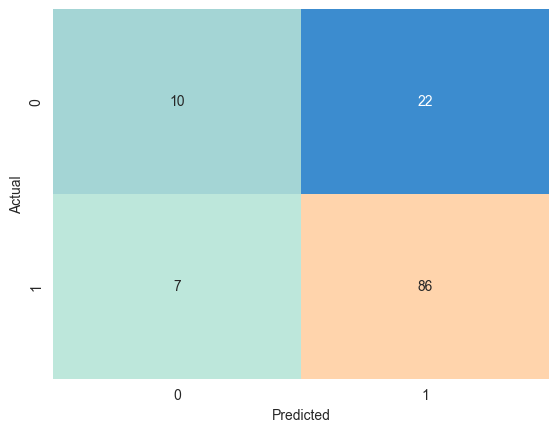

In [56]:
sns.heatmap(cnf, annot=True, cbar=False, cmap='icefire')
plt.xlabel('Predicted')
plt.ylabel('Actual')